<a href="https://colab.research.google.com/github/esnue/ThesisAllocationSystem/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization of CTM output results
In this notebook, we will visualize our CTM output. 

## Import what we need

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.colors as mcolors

## Data
Let's import the dataframe that holds all of the relevant CTM outputs for our corpus of academic papers. 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
topics_df = pd.read_csv('/content/drive/MyDrive/ThesisAllocationSystem/data_final/ctm_label/train-label.csv')

print(topics_df.sample(5))

           prof  ...                                       distribution
523  iacovone46  ...  [0.003288824256742373, 0.0037690511089749634, ...
516  iacovone39  ...  [0.002699432516237721, 0.01762390029616654, 0....
481   iacovone3  ...  [0.008093528030440212, 0.007467437221202999, 0...
544      patz16  ...  [0.047123029397334905, 0.0091903032240225, 0.0...
149   costello1  ...  [0.003789943731680978, 0.0038773044245317577, ...

[5 rows x 4 columns]


## Create wide & long format

In [6]:
# Extract list of topic proportions 
list_prop = topics_df.iloc[:,3]

# Convert to float array
ar_float = np.array([[float(i) for i in j[1:-1].split(', ')] for j in list_prop])

# Create col labels 
topics = []
for i in list(range(0, 28)):
     topics.append('Topic' + str(i))

# Add col labels to float array
topiclab_df = pd.DataFrame(data = ar_float, columns=topics)
topiclab_df.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,Topic20,Topic21,Topic22,Topic23,Topic24,Topic25,Topic26,Topic27
0,0.007617,0.011388,0.043832,0.014364,0.020481,0.006957,0.017882,0.005846,0.006433,0.105581,0.009290,0.027109,0.017887,0.063412,0.005752,0.032014,0.012873,0.033323,0.074364,0.102481,0.011663,0.081695,0.015003,0.004601,0.004648,0.007496,0.250168,0.005839
1,0.024517,0.016639,0.049658,0.013194,0.014712,0.019593,0.014759,0.009580,0.030882,0.024051,0.037934,0.107400,0.027896,0.042427,0.033954,0.025247,0.036476,0.019214,0.097950,0.099500,0.018998,0.037302,0.065800,0.018773,0.006648,0.016782,0.076794,0.013320
2,0.035848,0.001610,0.005467,0.005517,0.001657,0.037659,0.002507,0.092979,0.142037,0.028727,0.016458,0.004215,0.043899,0.001490,0.005473,0.010783,0.125345,0.012862,0.006455,0.001103,0.123404,0.004545,0.012896,0.046433,0.129222,0.049025,0.003912,0.048472
3,0.011855,0.023321,0.032876,0.021375,0.012057,0.010459,0.011519,0.011965,0.013303,0.088639,0.035930,0.040342,0.038739,0.048417,0.014271,0.019150,0.017844,0.020186,0.089197,0.089927,0.010183,0.077993,0.047796,0.003997,0.008492,0.008275,0.184336,0.007555
4,0.009613,0.015862,0.043615,0.009901,0.029389,0.010319,0.013241,0.008602,0.007651,0.042200,0.014387,0.031873,0.027205,0.021180,0.019408,0.034305,0.010615,0.022399,0.068203,0.127182,0.011444,0.052249,0.020590,0.007489,0.007830,0.011275,0.315658,0.006316


In [7]:
# Change col name 
topics_df.rename(columns={"topic": "topic_words"}, inplace = True)

# Append wide format to topics_df
topics_df_wide = pd.concat([topics_df.iloc[:, 0:3], topiclab_df], axis = 1)

# Reshape to long format
topics_df_long = topics_df_wide.melt(id_vars = ['prof', 'topic_id', 'topic_words'],
                                     var_name = 'topic',
                                     value_name = 'topic_prop')

In [8]:
print("This is the wide format.\n", topics_df_wide.head(5))
print("This is the long format.\n", topics_df_long.head(5))

This is the wide format.
             prof  topic_id  ...   Topic26   Topic27
0  hammerschmid1        26  ...  0.250168  0.005839
1  hammerschmid2        11  ...  0.076794  0.013320
2  hammerschmid3         8  ...  0.003912  0.048472
3  hammerschmid4        26  ...  0.184336  0.007555
4  hammerschmid5        26  ...  0.315658  0.006316

[5 rows x 31 columns]
This is the long format.
             prof  topic_id  ...   topic topic_prop
0  hammerschmid1        26  ...  Topic0   0.007617
1  hammerschmid2        11  ...  Topic0   0.024517
2  hammerschmid3         8  ...  Topic0   0.035848
3  hammerschmid4        26  ...  Topic0   0.011855
4  hammerschmid5        26  ...  Topic0   0.009613

[5 rows x 5 columns]


## Stacked Bar Chart

In [9]:
# Confirm percentage distribution by summing the percentages in each topic
topics_df_wide.iloc[:, 4:31].sum(axis=1) 

0      0.992383
1      0.975483
2      0.964152
3      0.988145
4      0.990387
         ...   
806    0.971396
807    0.983707
808    0.974660
809    0.979365
810    0.986049
Length: 811, dtype: float64

In [39]:
# Remove number from prof
topics_df_wide['prof'] = topics_df_wide['prof'].str.replace('[0-9]', '')

# Create bar chart df 
bardat1 = pd.concat([topics_df_wide['prof'], topics_df_wide.iloc[:, 3:31]], axis = 1)

# Set prof as index (Necessary for pd.plot.barh)
# bardat1.set_index('prof')

In [43]:
# Solution 1: Average topic proportions per professor 
bardat2 = bardat1.groupby('prof').mean().reset_index()
print(bardat2)

bardat2.set_index('prof')

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,Topic20,Topic21,Topic22,Topic23,Topic24,Topic25,Topic26,Topic27
prof,,,,,,,,,,,,,,,,,,,,,,,,,,,,
anheier,0.029774,0.017553,0.032445,0.021664,0.018400,0.026530,0.017568,0.042926,0.055471,0.027229,0.080693,0.041939,0.041518,0.045118,0.054492,0.025518,0.064628,0.014243,0.086710,0.042927,0.045627,0.028639,0.048765,0.009583,0.012117,0.017201,0.036109,0.014611
bryson,0.037226,0.044407,0.022027,0.013928,0.020753,0.039381,0.021580,0.023879,0.057851,0.012059,0.018306,0.022614,0.049353,0.010437,0.029138,0.028615,0.031153,0.020510,0.011672,0.012785,0.048755,0.015464,0.037090,0.093923,0.215083,0.019390,0.006881,0.035743
bryson (),0.055450,0.045122,0.037208,0.013991,0.009000,0.043869,0.017769,0.014134,0.035540,0.005476,0.069497,0.096632,0.061171,0.015136,0.085742,0.018415,0.011421,0.009480,0.028253,0.010553,0.019098,0.011786,0.109146,0.048472,0.071045,0.016877,0.007992,0.031725
cali,0.005539,0.007245,0.044213,0.012589,0.196073,0.006639,0.293820,0.245696,0.016820,0.008036,0.015188,0.005707,0.006819,0.002795,0.005559,0.004740,0.023607,0.004413,0.006565,0.008983,0.023882,0.010979,0.006905,0.006476,0.005516,0.012588,0.005383,0.007225
cingolani,0.026793,0.028923,0.051184,0.024577,0.033446,0.020342,0.021582,0.014341,0.018733,0.065108,0.026459,0.046435,0.068589,0.032666,0.038486,0.027810,0.017507,0.028140,0.079473,0.058092,0.019639,0.046305,0.029096,0.018489,0.024325,0.021716,0.094852,0.016892
cis,0.029413,0.084939,0.062133,0.030829,0.046611,0.033505,0.037139,0.031756,0.037961,0.033196,0.058111,0.048424,0.034692,0.020211,0.027295,0.017315,0.031545,0.018741,0.028455,0.044141,0.031392,0.027118,0.032026,0.039446,0.041806,0.025814,0.020578,0.025408
costello,0.008263,0.007562,0.056397,0.016066,0.224632,0.005500,0.187663,0.203642,0.030153,0.014306,0.009675,0.005459,0.008322,0.002829,0.006854,0.008208,0.043833,0.005602,0.006856,0.007496,0.055035,0.026428,0.009317,0.007783,0.007826,0.014266,0.010998,0.009032
flachsland,0.011399,0.029662,0.018862,0.206501,0.014973,0.021777,0.020008,0.018349,0.026918,0.133887,0.044640,0.025772,0.044921,0.025437,0.041716,0.044241,0.021803,0.028679,0.067842,0.013404,0.018862,0.025501,0.017988,0.010975,0.023265,0.008358,0.023272,0.010988
graf,0.071186,0.005576,0.021625,0.040211,0.015482,0.006357,0.013427,0.024283,0.067656,0.034715,0.006514,0.010563,0.039833,0.049175,0.068052,0.048340,0.063488,0.017493,0.033106,0.014017,0.052372,0.130314,0.014669,0.011228,0.021479,0.020668,0.067128,0.031047


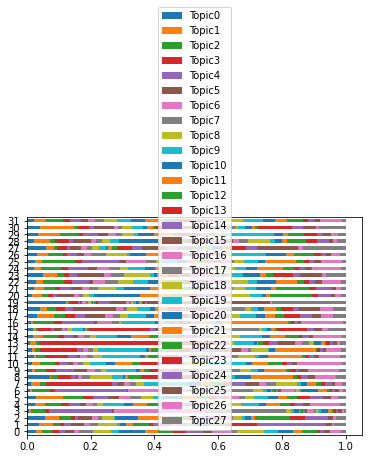

In [45]:
bardat2.plot.barh(x = stacked = True)

          A         B         C         D
0  0.396402  0.243974  0.015268  0.344357
1  0.243086  0.173049  0.254870  0.328995
2  0.350361  0.329740  0.018082  0.301818
3  0.371622  0.165851  0.289283  0.173245
4  0.263605  0.367149  0.178046  0.191199
5  0.472775  0.023370  0.420572  0.083284
6  0.192623  0.248311  0.265460  0.293606
7  0.339379  0.079707  0.084317  0.496598
8  0.091267  0.222760  0.564415  0.121559
9  0.385159  0.049611  0.459297  0.105934


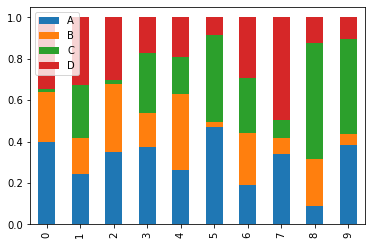

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

X = np.random.rand(10,4)
X/= X.sum(axis=1,keepdims=True)

df = pd.DataFrame(X, columns = ['A', 'B', 'C', 'D'])

print(df)
df.plot.bar(stacked=True)

In [100]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = df.plot.bar(rot=0)

,speed,lifespan
snail,0.1,2.0
pig,17.5,8.0
elephant,40.0,70.0
rabbit,48.0,1.5
giraffe,52.0,25.0
coyote,69.0,12.0
horse,88.0,28.0


## Bar Chart: Word Counts of Topic Keywords

In [11]:
topics_df_long

,prof,topic_id,topic_words,topic,topic_prop
0,hammerschmid1,26,"['public', 'policy', 'countries', 'administrat...",Topic0,0.007617
1,hammerschmid2,11,"['public', 'social', 'policy', 'actors', 'poli...",Topic0,0.024517
2,hammerschmid3,8,"['enable', 'attempt', 'govern', 'existence', '...",Topic0,0.035848
3,hammerschmid4,26,"['public', 'policy', 'countries', 'administrat...",Topic0,0.011855
4,hammerschmid5,26,"['public', 'policy', 'countries', 'administrat...",Topic0,0.009613
...,...,...,...,...,...
22703,wegrich2,19,"['political', 'public', 'media', 'information'...",Topic27,0.013572
22704,wegrich14,18,"['public', 'policy', 'political', 'government'...",Topic27,0.010232
22705,wegrich22,1,"['different', 'power', 'literature', 'effect',...",Topic27,0.027023
22706,wegrich19,26,"['public', 'policy', 'countries', 'administrat...",Topic27,0.013749


In [ ]:
#from: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/
# Plot Word Count and Weights of Topic Keywords
topics = topics_df["topic_words"]
topic_id = topics_df["topic_id"]
dist = topics_df["distribution"]

#too many loops -> breaks RAM 
out = []
for word in topics:
    for d in dist:
      for i in topic_id:
          out.append([word, dist, i]) #we don't have word count from the CTM -> could it be added?


df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()